<a href="https://colab.research.google.com/github/greapis/Python_practice/blob/main/Isuan_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import tensorflow as tf

print(tf.__version__)
print(np.__version__)

2.17.0
1.26.4


In [44]:
# xData = [1, 2, 3, 4, 5, 6, 7]
# yData = [25,000,  55,000, 75,000, 110,000, 128,000, 155,000, 180,000]

# W = tf.Variable(tf.random.uniform([1], -100, 100))
# b = tf.Variable(tf.random.uniform([1], -100, 100))
# X = xData = tf.constant(xData, dtype=tf.float32)
# Y = yData = tf.constant(yData, dtype=tf.float32)
# H = W * X + b

In [45]:
# cost = tf.reduce_mean(tf.square(H - Y))
# a = tf.Variable(0.01)
# optimizer = tf.train.GradientDescentOptimizer(a)
# train = optimizer.minimize(cost)
# init = tf.global_variables_initializer()
# sess = tf.Session()
# sess.run(init)

In [46]:
# for i in range(5001):
#   sess.run(train, feed_dict={X: xData, Y: yData})
#   if i % 500 == 0:
#     print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))
# print (sess.run(H, feed_dict={X: [8]}))

In [47]:
import tensorflow as tf

# 데이터 준비
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]  # Corrected yData

# 변수 초기화
W = tf.Variable(tf.random.uniform([1], -100, 100))
b = tf.Variable(tf.random.uniform([1], -100, 100))

In [48]:
# 모델 정의
def model(X):
  # Convert X to float32 before multiplication
  return W * tf.cast(X, dtype=tf.float32) + b

# 손실 함수 정의
def compute_loss(Y_pred, Y_true):
  return tf.reduce_mean(tf.square(Y_pred - Y_true))

# 옵티마이저 정의
optimizer = tf.optimizers.SGD(learning_rate = 0.01)

In [49]:
#  학습 함수 정의
def train_step(X, Y):
  with tf.GradientTape() as tape:
    Y_pred = model(X)
    # Cast Y to float32 before calculating loss
    loss = compute_loss(Y_pred, tf.cast(Y, dtype=tf.float32))
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))
  return loss

#  데이터셋 준비
dataset = tf.data.Dataset.from_tensor_slices((xData, yData)).batch(len(xData)) # Now xData and yData have the same length

In [50]:
# 학습
for epoch in range(1001):
  for X_batch, Y_batch in dataset:
    loss = train_step(X_batch, Y_batch)
  if epoch % 100 ==0:
    print(f'Epoch {epoch}: Loss = {loss.numpy()}, W = {W.numpy()}, b = {b.numpy()}')

Epoch 0: Loss = 13523526656.0, W = [10336.98], b = [2059.2937]
Epoch 100: Loss = 9825793.0, W = [25151.61], b = [3861.2002]
Epoch 200: Loss = 9184858.0, W = [25308.658], b = [3083.5034]
Epoch 300: Loss = 8888220.0, W = [25415.498], b = [2554.4329]
Epoch 400: Loss = 8750935.0, W = [25488.186], b = [2194.5022]
Epoch 500: Loss = 8687399.0, W = [25537.633], b = [1949.64]
Epoch 600: Loss = 8657985.0, W = [25571.273], b = [1783.0571]
Epoch 700: Loss = 8644381.0, W = [25594.158], b = [1669.7288]
Epoch 800: Loss = 8638085.0, W = [25609.727], b = [1592.6338]
Epoch 900: Loss = 8635157.0, W = [25620.318], b = [1540.1852]
Epoch 1000: Loss = 8633815.0, W = [25627.523], b = [1504.5048]


In [51]:
import tensorflow as tf

a = tf.constant(1)
b = tf.constant(2)

c = tf.add(a, b)
# sess = tf.Session()
# sess.run(c)

c

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [52]:
import tensorflow as tf

a = tf.Variable(5)
b = tf.Variable(3)

c = tf.multiply(a, b)
# init = tf.global_variables_initializer()

print(c)

tf.Tensor(15, shape=(), dtype=int32)


In [53]:
import tensorflow as tf

input_data = [1, 2, 3, 4, 5]

# x = tf.placeholder(dtype=tf.float32)
x = tf.constant(input_data, dtype=tf.float32)
y = x + 5

# sess = tf.Session()
# sess.run(y, feed_dict={x: input})

# print(y)

print(y.numpy())

[ 6.  7.  8.  9. 10.]


In [54]:
import tensorflow as tf
import numpy as np

mathscore = [85, 99, 84, 97, 92]
englishscore = [59, 80, 84, 68, 77]

a = tf.constant(mathscore, dtype=tf.float32)
b = tf.constant(englishscore, dtype=tf.float32)

# a = tf.placeholder(dtype=tf.float32)
# b = tf.placeholder(dtype=tf.float32)

y = (a + b) / 2

# sess = tf.Session()
# sess.run(y, feed_dict={a: mathscore, b: englishscore})

print(y.numpy())

[72.  89.5 84.  82.5 84.5]


In [55]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [56]:
df = pd.DataFrame(columns=['x', 'y'])

In [57]:
df.loc[0] = [2, 3]
df.loc[1] = [2, 1]
df.loc[2] = [4, 3]
df.loc[3] = [5, 2]
df.loc[4] = [6, 4]
df.loc[5] = [7, 5]
df.loc[6] = [6, 6]
df.loc[7] = [5, 7]
df.loc[8] = [4, 6]
df.loc[9] = [3, 5]
df.loc[10] = [2, 4]
df.loc[11] = [10, 15]
df.loc[12] = [12, 16]
df.loc[13] = [14, 17]
df.loc[14] = [15, 16]
df.loc[15] = [16, 15]
df.loc[16] = [17, 14]
df.loc[17] = [18, 13]
df.loc[18] = [19, 12]
df.loc[19] = [20, 11]
df.loc[20] = [21, 10]

In [58]:
df.head(10)

,x,y
0,2,3
1,2,1
2,4,3
3,5,2
4,6,4
5,7,5
6,6,6
7,5,7
8,4,6
9,3,5


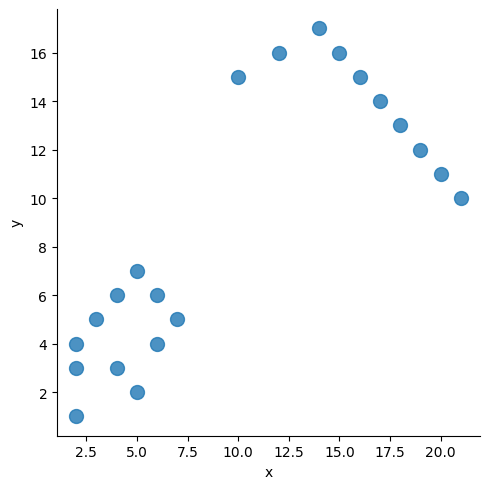

In [59]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100})

Text(33.25000000000001, 0.5, 'y')

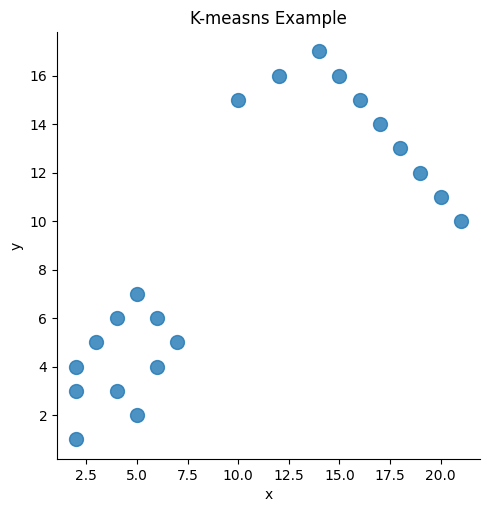

In [60]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100})
plt.title('K-measns Example')
plt.xlabel('x')
plt.ylabel('y')

In [61]:
points = df.values
kmeans = KMeans(n_clusters=4).fit(points)
kmeans.cluster_centers_

array([[ 3. ,  3. ],
       [19. , 12. ],
       [13.4, 15.8],
       [ 5.6,  5.6]])

In [62]:
kmeans.labels_

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1],
      dtype=int32)

In [63]:
df['cluster'] = kmeans.labels_
df.head(10)

,x,y,cluster
0,2,3,0
1,2,1,0
2,4,3,0
3,5,2,0
4,6,4,3
5,7,5,3
6,6,6,3
7,5,7,3
8,4,6,3
9,3,5,0


Text(36.30377083333334, 0.5, 'y')

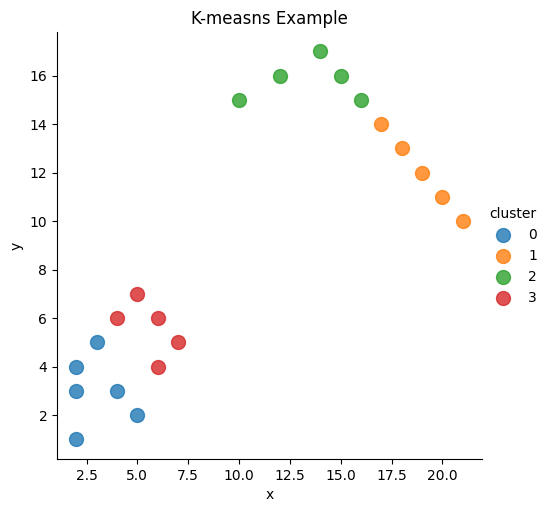

In [64]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100}, hue='cluster')
plt.title('K-measns Example')
plt.xlabel('x')
plt.ylabel('y')

In [65]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv
import pandas as pd
import os

# 배추가격 예측 시계열 모델

# model = tf.global_variables_initializer()
# current_directory = os.getcwd()

# file_path = os.path.join(current_directory, 'price data.csv')

# data = pd.read_csv('price data.csv', sep=',')

# xy = np.array(data, dtype=np.float32)

In [76]:
# 간단한 수식 산출 및 예측 값 만들기

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras


model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=200)

# print(model.predict([10.0]))
print(model.predict(np.array([10.0])))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - loss: 50.7653
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 40.3366
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 32.1237
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 25.6542
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 20.5565
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 16.5382
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 13.3693
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 10.8688
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 8.8944
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 7.3339
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 6.0993
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 5.1212
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 4.3451
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 3.7279
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 3.2361
Epoch 16/200
